In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/Titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# to check the information of our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape  # we can see that there are 891 rows and 12 columns in our dataset

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:

# checking if any column has some missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Some Observations:
- There are 891 passengers in our titanic dataset.
- The Age column is missing 177 values, so we need to fill this missing values.
- The Cabin column is missing 687 values. Since so much of the column values  
  missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
- The Embarked column is missing 2 values we can fill this missing values.

In [7]:
data[data.duplicated()]    # no duplicate data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data.describe()    # checking the statistical measures

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**HANDLING MISSING VALUES**

In [9]:
# Checking the % of null values present in each column.
data.isnull().sum()*100/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# 77% missing values in Cabin column so we need to drop the whole column

data.drop(['Cabin'], inplace = True, axis = 1)

In [11]:
# 19% of missing values in Age column so we need to replace those with the mean value.

data['Age'].fillna(data['Age'].mean(), inplace = True)

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# removing unnecessary columns...
data.drop(['Name','PassengerId','Ticket'],axis=1, inplace = True)

Relationship between Features and Survival

In [15]:
# we analyze relationship between different features with respect to Survival.

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Here. 0 means person not_survived and 1 means person survived.**

**Exploratory Data Analysis**

<Axes: xlabel='Survived', ylabel='count'>

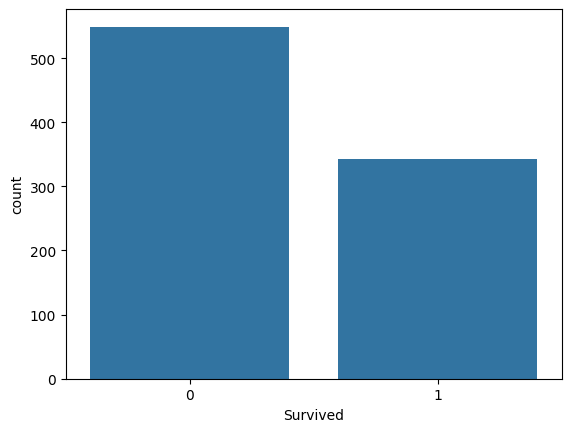

In [16]:
# plotting survived column

sns.countplot(x= data['Survived'])

In [17]:
# 1) pclass vs survived

data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
pclass_survived = data.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

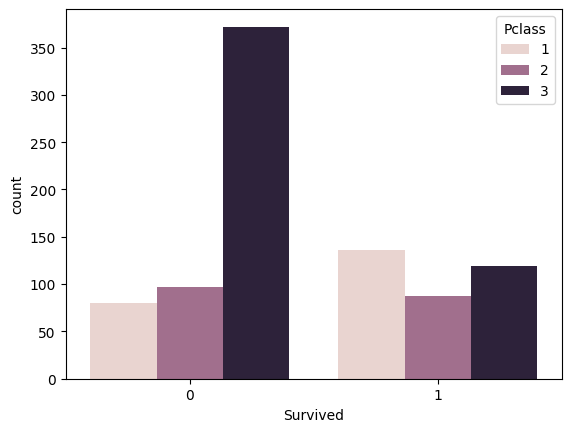

In [19]:
# plotting the Pclass vs Survived
sns.countplot(x = data['Survived'],hue = data['Pclass'])

Higher class passengers have better survival chance (may be because they are more privilege to be saved

In [20]:
# 2) Sex vs. Survived

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
sex_survival = data.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

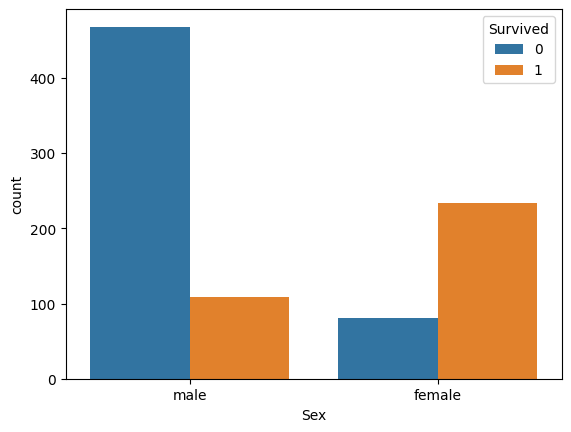

In [22]:
# plotting the Sex vs Survived
sns.countplot(x = data['Sex'],hue = data['Survived'])

We can see that females have better survival chance than male.

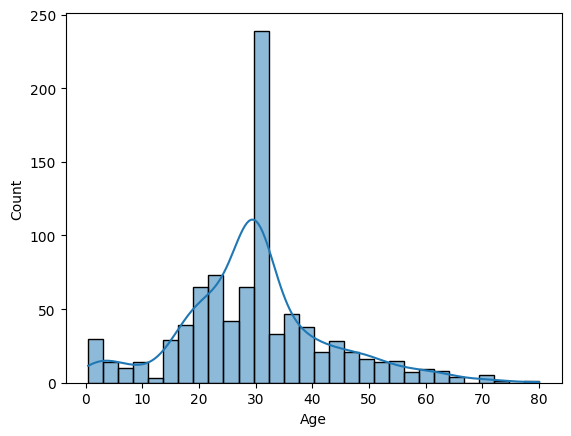

In [23]:
sns.histplot(data['Age'],kde = True)
plt.show()

We can see that most of the passengers wwere between age of 20 nd 40., this is positively skew distribution.

<Axes: xlabel='SibSp', ylabel='count'>

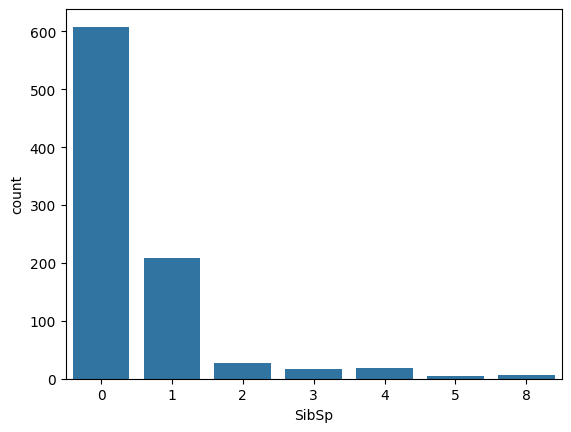

In [24]:
sns.countplot(x = data['SibSp'])

we can conclude that most of the passengers were travelling without there siblings or spouse.

<Axes: xlabel='Parch', ylabel='count'>

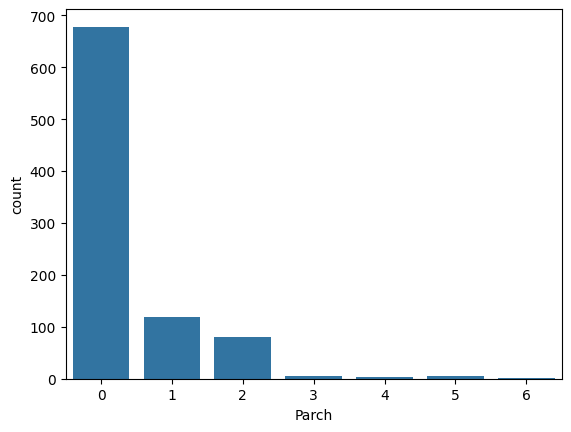

In [25]:
sns.countplot(x = data['Parch'])

most of the passengers were travelling without there children.

<Axes: xlabel='Fare', ylabel='Count'>

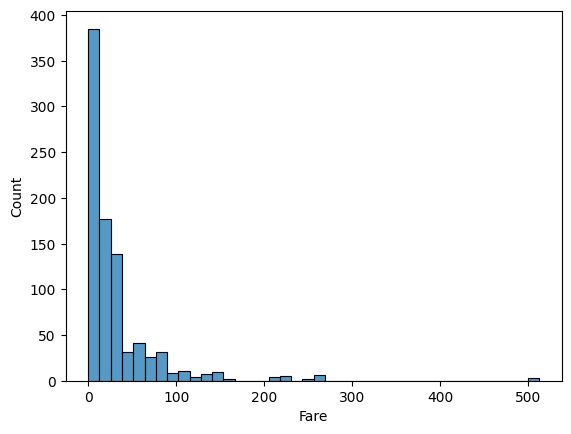

In [26]:
sns.histplot(x = data['Fare'],bins = 40)

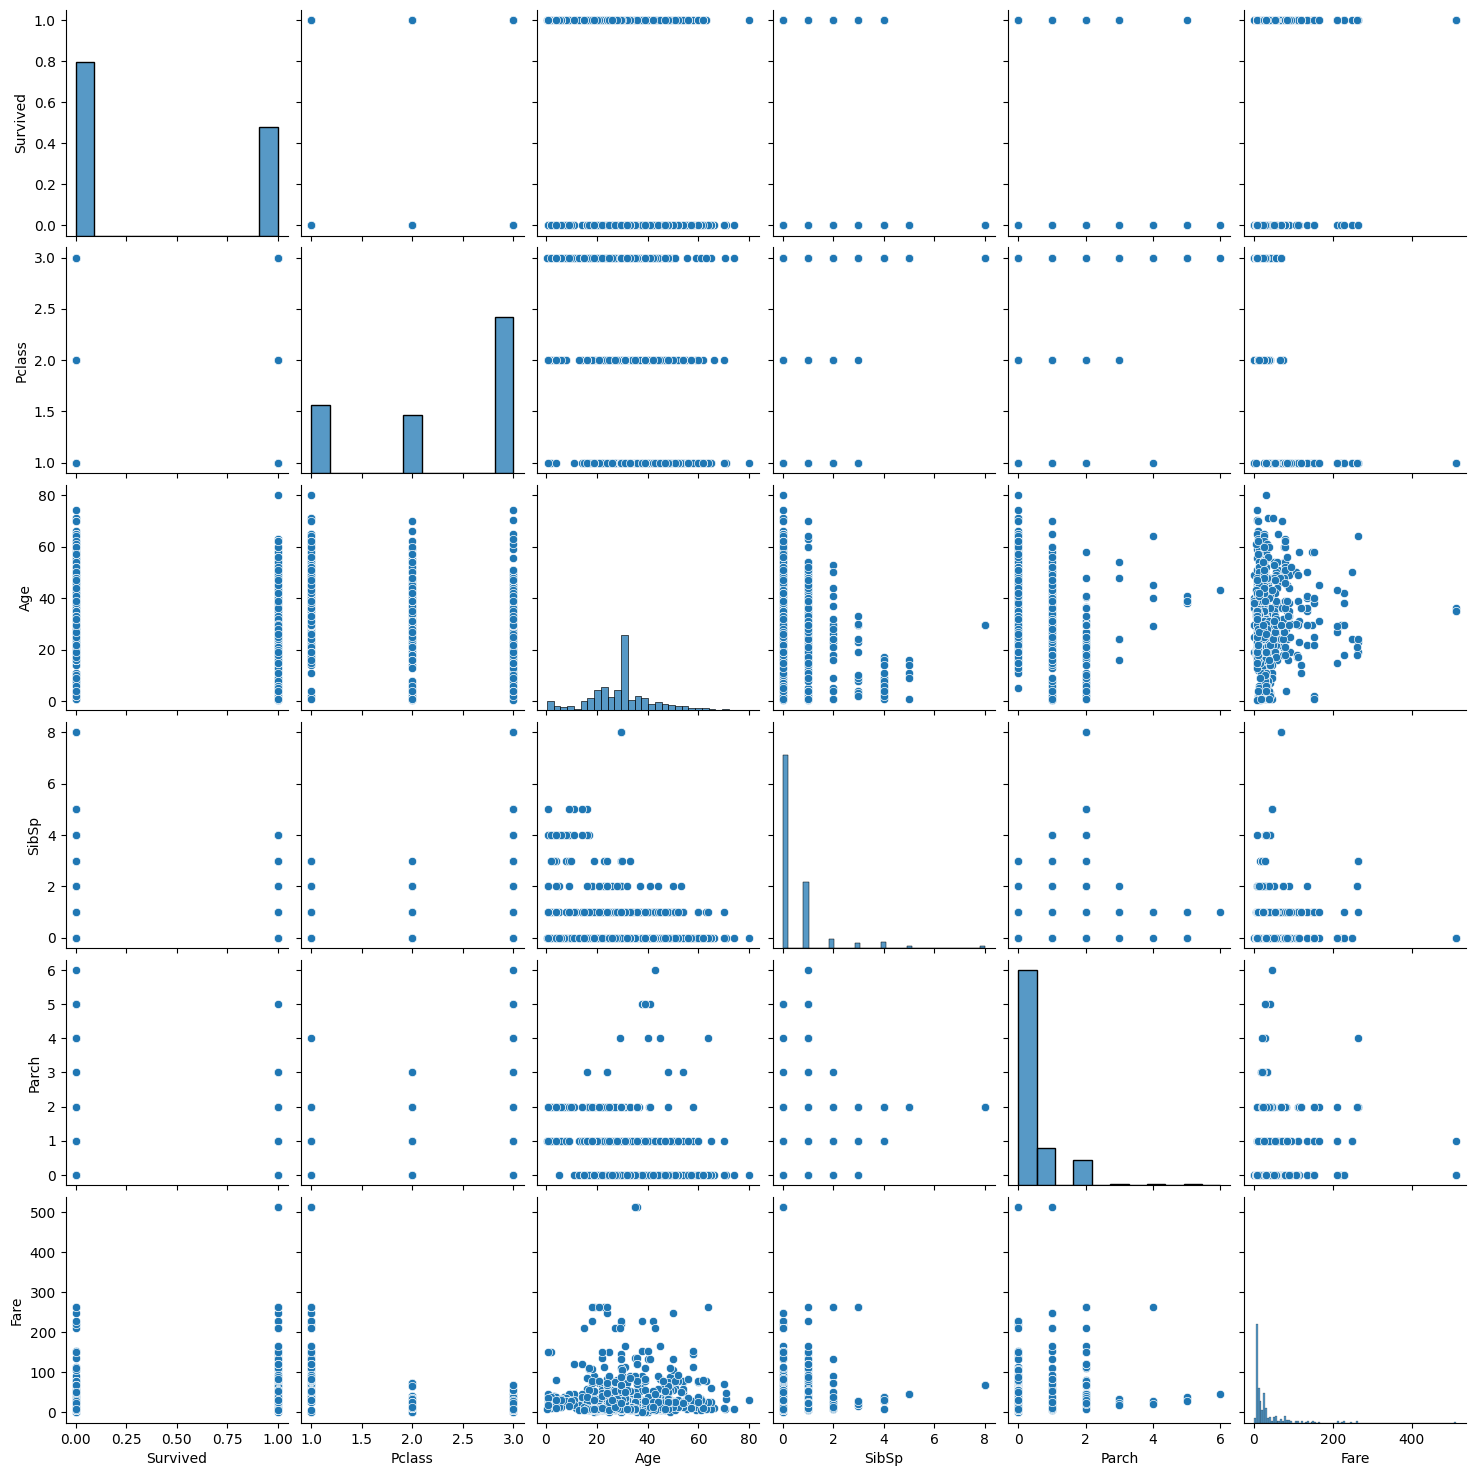

In [27]:
sns.pairplot(data)

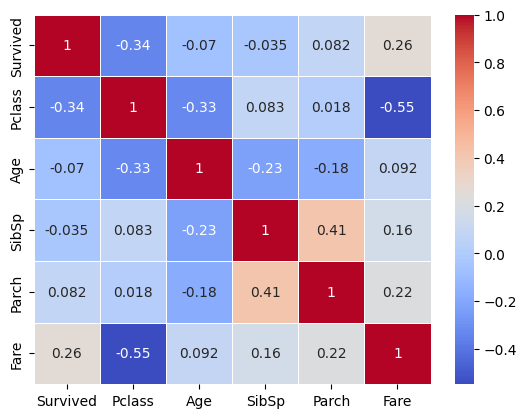

In [28]:
#The correlation matrix provides a numerical overview of relationships between numerical features. It suggests potential multicollinearity between certain variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [29]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
# Converting Categorical columns into Numerical columns using One Hot Encoding...

d={'male':0, 'female':1}
data['Sex'] = data['Sex'].apply(lambda x:d[x])



e = {'C':0,'Q':1,'S':2}
data['Embarked'] = data['Embarked'].apply(lambda x:e[x])




In [31]:
#  new data after converting
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


**Feature Selection.**

In [32]:
x = data[['Age','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
y = data['Survived']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3,random_state = 7)

**1) Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:" , accuracy_score(y_test,y_pred))

Accuracy Score: 0.7574626865671642


In [35]:

from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


**2) SVC**

In [36]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
svc_pred = svc_model.predict(x_test)




In [38]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,svc_pred)
print(confusion_mat)
print(classification_report(y_test,svc_pred))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



**3) KNeighborsClassifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(x_train,y_train)
kn_pred = kn_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,kn_pred))

Accuracy Score: 0.6455223880597015


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test, kn_pred)
print(confusion_mat)
print(classification_report(y_test, kn_pred))

[[125  31]
 [ 64  48]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       156
           1       0.61      0.43      0.50       112

    accuracy                           0.65       268
   macro avg       0.63      0.61      0.61       268
weighted avg       0.64      0.65      0.63       268



**4) Navie Bayes**

In [41]:

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_pred = nb_model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,nb_pred))

Accuracy Score: 0.7686567164179104


In [43]:


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,nb_pred)
print(confusion_mat)
print(classification_report(y_test,nb_pred))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



**5) DecisionTreeClassifier**

In [44]:

from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier(criterion='entropy',random_state=7)
dec_model.fit(x_train,y_train)
dec_pred = dec_model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,dec_pred))

Accuracy Score: 0.7201492537313433


In [45]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,dec_pred)
print(confusion_mat)
print(classification_report(y_test,dec_pred))

[[124  32]
 [ 43  69]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       156
           1       0.68      0.62      0.65       112

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [46]:

results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
